# 👉 Predicting Heart Disease Using Machine Learning

#### This notebook looks into using various Python-based  Machine learning and Data Science Libraries   in an attempt to build a machine learning model capable of predicting weather or not someone has Heart Dieases based on their medical records

we are going to take following approach: 
1. Problem Defination
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimantation


## 1. Problem Defination

> given clinical parameters about a patient, can we predict weather or not a patient have heart disease ?


## 2. Data

The orignal data came from the cleavland data from uci Machine learnin repository.


## 3.Evalution

> if we can reach the 95% accuracy at predicting wheather or not a patient has heart disease during the proof of concept, we'll pursue the project


## 4. Features

This is where you'll get different information about each of features in your data.

* This includes Data dictionary




# Preparing the tools
we are going to use `Pandas`, `NumPy` and `Matplotlib` for Data Analysis and manuplation

In [15]:
# import all tools we need

# Regular EDA (Exploratory data Analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear in the notebook 
%matplotlib inline

# Models from Siket-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evalutions
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Load data

In [16]:
df = pd.read_csv('heart-disease_project.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data exploration (EDA)

In [17]:
# lets find out how many of each class there are
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '0')])

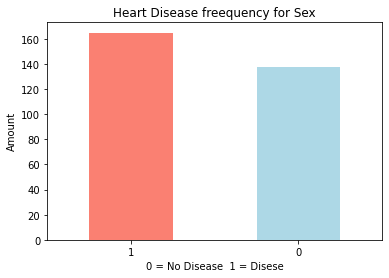

In [4]:
# visualize the target column
df['target'].value_counts().plot(kind="bar", color=['salmon', 'lightblue']);

plt.title("Heart Disease freequency for Sex")
plt.xlabel("0 = No Disease  1 = Disese")
plt.ylabel("Amount")
plt.xticks(rotation=0)

In [18]:
# compare target column with sex column using crosstab
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


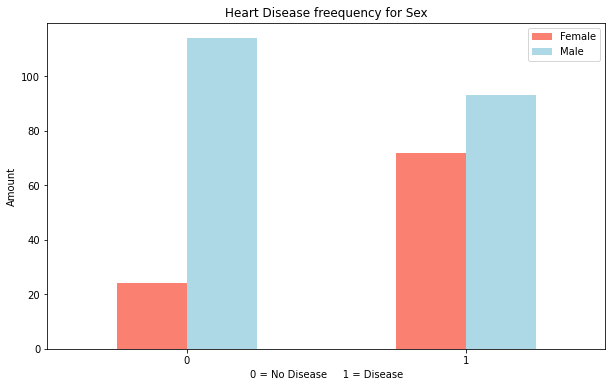

In [19]:
# plot the comparesion between target column and sex column

pd.crosstab(df['target'], df['sex']).plot(kind="bar", color=['salmon', 'lightblue'], figsize=(10,6))
plt.title("Heart Disease freequency for Sex")
plt.xlabel("0 = No Disease     1 = Disease")
plt.ylabel("Amount")
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

In [20]:
# compare target column with restecg column using crosstab
pd.crosstab(df.target, df.restecg).info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2 non-null      int64
 1   1       2 non-null      int64
 2   2       2 non-null      int64
dtypes: int64(3)
memory usage: 64.0 bytes


In [8]:
# plot the comparesion between target column and restecg column

# pd.crosstab(df['target'], df['restecg']).plot(kind="bar", color=['salmon', 'lightblue'], figsize=(10,6))
# plt.title("Heart Disease freequency for restecg")
# plt.xlabel("0=No Disease     1=Disease")
# plt.ylabel("Amount")
# plt.legend(['Female', 'Male'])
# plt.xticks(rotation=0);

## Age vs Max heart rate for Heart Disease

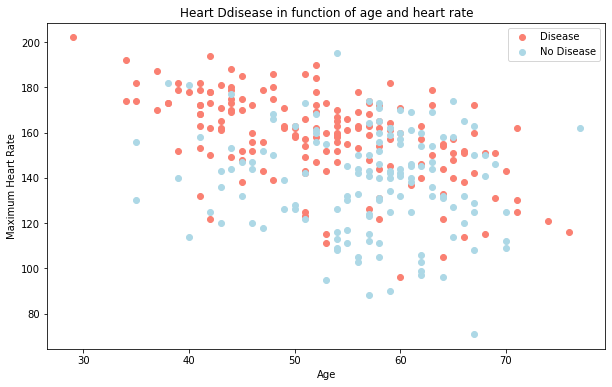

In [21]:
# create an other figure
plt.figure(figsize=(10, 6))

# scatter with positive examples
plt.scatter(df.age[df['target'] == 1],
           df.thalach[df['target'] == 1],
           c='salmon');

# scatter with negative numbers
plt.scatter(df.age[df['target'] != 1],
           df.thalach[df['target'] != 1],
           c='lightblue')


# add helpful info
plt.title("Heart Ddisease in function of age and heart rate")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.legend(['Disease', 'No Disease']);

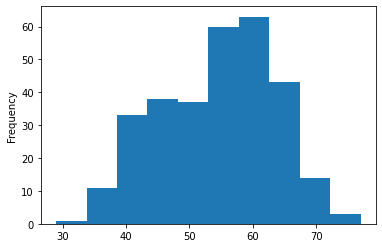

In [22]:
df['age'].plot.hist();

### Heart disease frequecy per chest pain Type


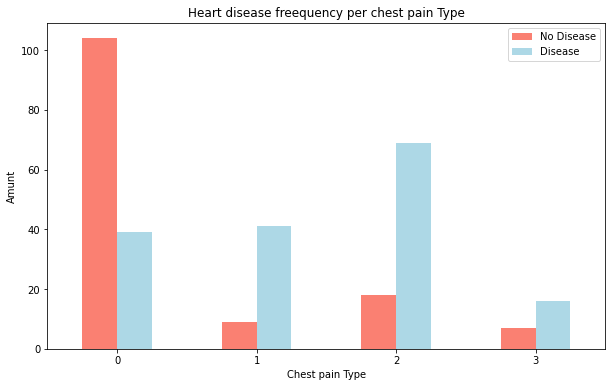

In [23]:
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                  figsize=(10, 6),
                                  color=['salmon', 'lightblue'])


plt.title('Heart disease freequency per chest pain Type')
plt.xlabel("Chest pain Type")
plt.ylabel('Amunt')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0);

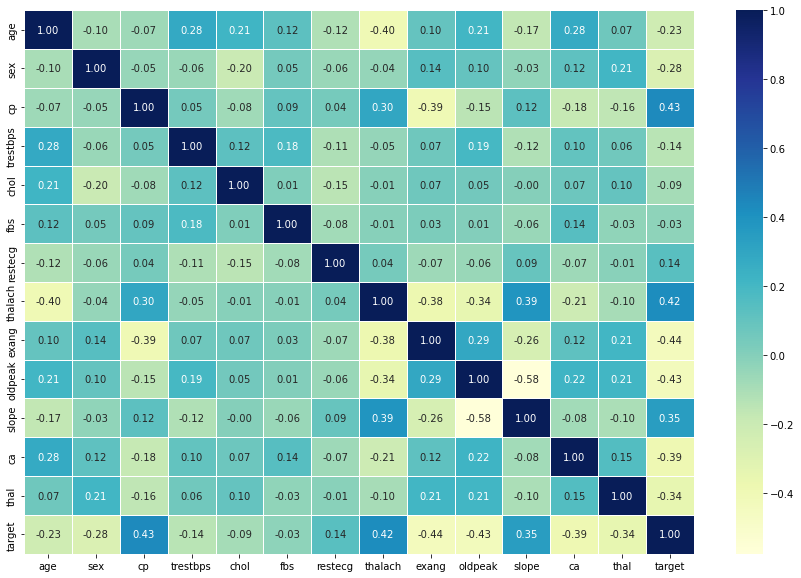

In [24]:
cor_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))

ax = sns.heatmap(cor_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

## Modeling

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
# Split data into X and Y
np.random.seed(42)

x = df.drop('target', axis=1)
y = df['target']


x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.2)



# clf = RandomForestClassifier(n_iteration=100)
# clf = LogisticRegression()
# 
# clf.fit(x_train, y_train)
# 
# clf.score(x_test, y_test)

In [50]:
# put model into dictionary

models = {

    "logistic_regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "LCF": RandomForestClassifier()
        
        }

def fit_and_score(models, x_train, x_test, y_train, y_test):
    # set random seed
    np.random.seed(42)
    
    # make a list to keep model scores
    model_scores = {}
    
    # loop through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(x_train, y_train)
        # evaluate the model and append the score in model_score
        model_scores[name] = model.score(x_test, y_test)
        
    return model_scores
    # model_scores

In [55]:
models_scores = fit_and_score(models, x_train, x_test, y_train, y_test)
models_scores

C:\Users\Ayaz Lakho\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logistic_regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'LCF': 0.8360655737704918}

## Model Comparesion

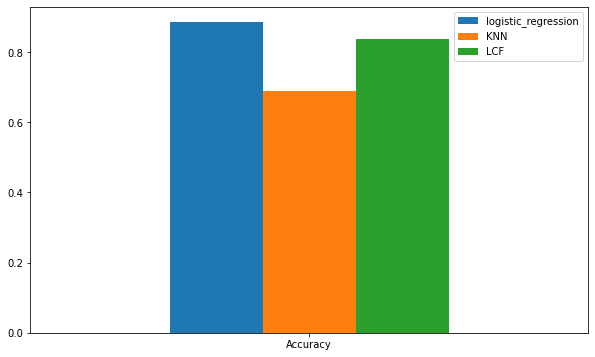

In [63]:
comp_model = pd.DataFrame(models_scores, index=["Accuracy"])
# comp_model.T.plot.bar();
comp_model.plot.bar(figsize=(10, 6))
plt.xticks(rotation=0);

## Hyperparameter tuning with GridSearchCV

In [64]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {
    "C": np.logspace(-4, 4, 30),
    "solver": ["liblinear"]
}

# Setup grid hyperparameters search for LogisticRegression model
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [65]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [66]:
gs_log_reg.score(x_test, y_test)

0.8852459016393442

## Evaluating our tuned machine learning Classifier , beyond Accuracy

* ROc curve and AUC score
* Confussion matrix
* Classification report
* Precision
* recall
* F1 score
> it would be great if cross validation is used where it is needed

To make comparision and evaluate our tuned model, First we need to make predictions

In [68]:
# make predictions

y_preds = gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

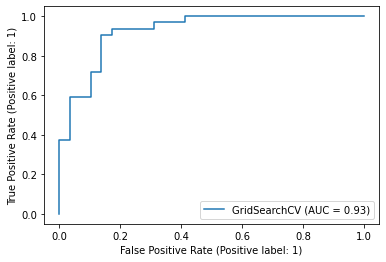

In [70]:
# plot a rock curve and calculate AUC curve
plot_roc_curve(gs_log_reg, x_test, y_test);

In [72]:
confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

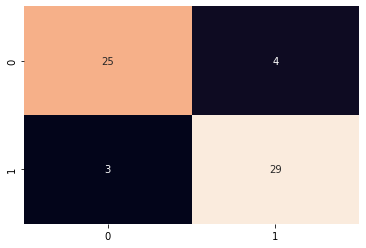

In [79]:
sns.heatmap(confusion_matrix(y_test, y_preds),
           annot=True,
           cbar=False);

#### Classification report, Cross_Validation, Recall and F1_score

In [81]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

